# Problem-1

In [1]:
import os
import sys
import glob

import numpy as np
import pandas as pd

from PIL import Image
from matplotlib import pyplot as plt
from tqdm import tqdm

import keras
from keras.utils import Sequence
from keras import models
from keras import layers
from keras import optimizers
from keras.utils import to_categorical

from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
from sklearn.model_selection import train_test_split
import random as r

from matplotlib import image

Using TensorFlow backend.


### Read labels file

In [2]:
read_label_file = pd.read_csv (r'monkey_labels.txt')
read_label_file['Label'] = read_label_file['Label'].str.replace(' ', '') 
read_label_file#.iloc[0,0]

,Label,Latin Name,Common Name,Train Images,Validation Images
0,n0,alouatta_palliata\t,mantled_howler,131,26
1,n1,erythrocebus_patas\t,patas_monkey,139,28
2,n2,cacajao_calvus\t,bald_uakari,137,27
3,n3,macaca_fuscata\t,japanese_macaque,152,30
4,n4,cebuella_pygmea\t,pygmy_marmoset,131,26
5,n5,cebus_capucinus\t,white_headed_capuchin,141,28
6,n6,mico_argentatus\t,silvery_marmoset,132,26
7,n7,saimiri_sciureus\t,common_squirrel_monkey,142,28
8,n8,aotus_nigriceps\t,black_headed_night_monkey,133,27
9,n9,trachypithecus_johnii,nilgiri_langur,132,26


### Read images names and store in list

In [3]:
#from PIL import Image
image_list = []
im_name = []
data = [] 
labels = []
newsize = (150, 150)

for filename in glob.glob('images/*.jpg'): 
    im=Image.open(filename).convert('L')
#    image_list.append(im)
    im1 = im.resize((newsize), Image.ANTIALIAS) 
    data.append(np.array(im1))
    #image_list.append(im)
    fold, imag = filename.split('\\')
    im_nam, ext = imag.split('.jpg')
    #im_name.append(im_nam)
    labels.append(np.array(im_nam[1:2]))
len(im_name)

0

1368


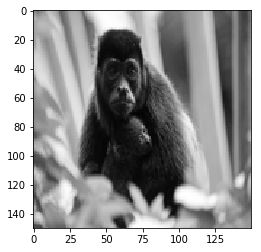

In [4]:
print(len(data))
#plt.imshow(data[0][0], cmap = 'gray')
plt.imshow(data[0], cmap = 'gray')

### Assign labels to the data

In [5]:
Xs = np.array(data) #image_df['Image']
y = to_categorical(labels)

X_train, X_test, Y_train, Y_test = train_test_split(Xs, y, test_size=0.2, random_state=r.randint(1, 100))

In [6]:
print('Dimension of the trianing input is:', X_train.shape)
print('Dimension of the test input is:', X_test.shape)

print('Dimension of the trianing target is:', Y_train.shape)
print('Dimension of the test target is:', Y_test.shape)

Dimension of the trianing input is: (1094, 150, 150)
Dimension of the test input is: (274, 150, 150)
Dimension of the trianing target is: (1094, 10)
Dimension of the test target is: (274, 10)


In [7]:
X_train = X_train.reshape((1094,150,150,1))
X_train = X_train.astype('float32')/255

X_test = X_test.reshape((274,150,150,1))
X_test = X_test.astype('float32')/255

Y_train.shape

(1094, 10)

In [8]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense

model = Sequential()

model.add(layers.Conv2D(filters=16,kernel_size=(3,3),activation='relu',input_shape = (150, 150, 1)))
model.add(layers.MaxPooling2D(pool_size=(2,2)))

model.add(layers.Conv2D(filters=16,kernel_size=(3,3),activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(2,2)))

#model.add(layers.Conv2D(filters=32,kernel_size=(3,3),activation='relu'))
#model.add(layers.MaxPooling2D(pool_size=(2,2)))

model.add(layers.Conv2D(filters=16,kernel_size=(3,3),activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(2,2)))

model.add(layers.Flatten())
model.add(layers.Dense(units=16,activation='relu'))
model.add(layers.Dense(units=10,activation='softmax'))

In [9]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 148, 148, 16)      160       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 74, 74, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 72, 72, 16)        2320      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 36, 36, 16)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 34, 34, 16)        2320      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 17, 17, 16)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 4624)             

In [10]:
model.compile(loss='categorical_crossentropy',optimizer='RMSprop',metrics=['accuracy'])

In [11]:
history = model.fit(X_train,Y_train,batch_size=64,epochs=100,validation_split=1/6,verbose=1)

Train on 911 samples, validate on 183 samples
Epoch 1/100
911/911 [==============================] - ETA: 13s - loss: 2.2988 - accuracy: 0.171 - ETA: 9s - loss: 2.4267 - accuracy: 0.148 - ETA: 7s - loss: 2.3853 - accuracy: 0.14 - ETA: 6s - loss: 2.3569 - accuracy: 0.15 - ETA: 5s - loss: 2.3504 - accuracy: 0.14 - ETA: 5s - loss: 2.3415 - accuracy: 0.13 - ETA: 4s - loss: 2.3370 - accuracy: 0.13 - ETA: 3s - loss: 2.3314 - accuracy: 0.12 - ETA: 3s - loss: 2.3282 - accuracy: 0.12 - ETA: 2s - loss: 2.3236 - accuracy: 0.12 - ETA: 1s - loss: 2.3198 - accuracy: 0.12 - ETA: 1s - loss: 2.3178 - accuracy: 0.12 - ETA: 0s - loss: 2.3156 - accuracy: 0.12 - ETA: 0s - loss: 2.3132 - accuracy: 0.12 - 9s 9ms/step - loss: 2.3129 - accuracy: 0.1207 - val_loss: 2.2643 - val_accuracy: 0.1639
Epoch 2/100
911/911 [==============================] - ETA: 6s - loss: 2.2669 - accuracy: 0.18 - ETA: 6s - loss: 2.2709 - accuracy: 0.13 - ETA: 5s - loss: 2.2642 - accuracy: 0.13 - ETA: 5s - loss: 2.2540 - accuracy: 0.13

911/911 [==============================] - ETA: 7s - loss: 1.5798 - accuracy: 0.45 - ETA: 6s - loss: 1.3474 - accuracy: 0.48 - ETA: 6s - loss: 1.2907 - accuracy: 0.52 - ETA: 5s - loss: 1.2047 - accuracy: 0.56 - ETA: 5s - loss: 1.1553 - accuracy: 0.59 - ETA: 4s - loss: 1.1234 - accuracy: 0.61 - ETA: 3s - loss: 1.1013 - accuracy: 0.62 - ETA: 3s - loss: 1.0955 - accuracy: 0.62 - ETA: 2s - loss: 1.0774 - accuracy: 0.63 - ETA: 2s - loss: 1.0757 - accuracy: 0.62 - ETA: 1s - loss: 1.0635 - accuracy: 0.63 - ETA: 1s - loss: 1.0501 - accuracy: 0.64 - ETA: 0s - loss: 1.0509 - accuracy: 0.63 - ETA: 0s - loss: 1.0361 - accuracy: 0.64 - 8s 9ms/step - loss: 1.0349 - accuracy: 0.6487 - val_loss: 2.6362 - val_accuracy: 0.3005
Epoch 24/100
911/911 [==============================] - ETA: 7s - loss: 1.8371 - accuracy: 0.34 - ETA: 6s - loss: 1.4821 - accuracy: 0.49 - ETA: 6s - loss: 1.3043 - accuracy: 0.56 - ETA: 5s - loss: 1.1759 - accuracy: 0.60 - ETA: 5s - loss: 1.1137 - accuracy: 0.63 - ETA: 4s - loss:

911/911 [==============================] - ETA: 9s - loss: 0.0929 - accuracy: 0.96 - ETA: 8s - loss: 0.0774 - accuracy: 0.98 - ETA: 8s - loss: 0.0780 - accuracy: 0.98 - ETA: 7s - loss: 0.1031 - accuracy: 0.98 - ETA: 6s - loss: 0.1181 - accuracy: 0.97 - ETA: 5s - loss: 0.1137 - accuracy: 0.97 - ETA: 5s - loss: 0.1271 - accuracy: 0.97 - ETA: 4s - loss: 0.1435 - accuracy: 0.96 - ETA: 3s - loss: 0.1674 - accuracy: 0.95 - ETA: 2s - loss: 0.1641 - accuracy: 0.95 - ETA: 2s - loss: 0.1647 - accuracy: 0.95 - ETA: 1s - loss: 0.1601 - accuracy: 0.95 - ETA: 0s - loss: 0.1588 - accuracy: 0.96 - ETA: 0s - loss: 0.1543 - accuracy: 0.96 - 10s 11ms/step - loss: 0.1522 - accuracy: 0.9627 - val_loss: 3.1467 - val_accuracy: 0.4754
Epoch 46/100
911/911 [==============================] - ETA: 8s - loss: 0.0891 - accuracy: 0.98 - ETA: 7s - loss: 0.0675 - accuracy: 0.99 - ETA: 6s - loss: 0.0595 - accuracy: 0.99 - ETA: 6s - loss: 0.0704 - accuracy: 0.99 - ETA: 5s - loss: 0.0726 - accuracy: 0.99 - ETA: 4s - los

911/911 [==============================] - ETA: 5s - loss: 0.0157 - accuracy: 1.00 - ETA: 7s - loss: 0.0121 - accuracy: 1.00 - ETA: 8s - loss: 0.0098 - accuracy: 1.00 - ETA: 7s - loss: 0.0099 - accuracy: 1.00 - ETA: 7s - loss: 0.0101 - accuracy: 1.00 - ETA: 6s - loss: 0.0153 - accuracy: 0.99 - ETA: 5s - loss: 0.0139 - accuracy: 0.99 - ETA: 4s - loss: 0.0143 - accuracy: 0.99 - ETA: 3s - loss: 0.0132 - accuracy: 0.99 - ETA: 2s - loss: 0.0124 - accuracy: 0.99 - ETA: 2s - loss: 0.0117 - accuracy: 0.99 - ETA: 1s - loss: 0.0119 - accuracy: 0.99 - ETA: 0s - loss: 0.0117 - accuracy: 0.99 - ETA: 0s - loss: 0.0113 - accuracy: 0.99 - 10s 11ms/step - loss: 0.0111 - accuracy: 0.9978 - val_loss: 4.7458 - val_accuracy: 0.4754
Epoch 68/100
911/911 [==============================] - ETA: 7s - loss: 0.0165 - accuracy: 1.00 - ETA: 7s - loss: 0.0172 - accuracy: 1.00 - ETA: 6s - loss: 0.0138 - accuracy: 1.00 - ETA: 6s - loss: 0.0113 - accuracy: 1.00 - ETA: 5s - loss: 0.0101 - accuracy: 1.00 - ETA: 5s - los

911/911 [==============================] - ETA: 5s - loss: 9.0885e-04 - accuracy: 1.00 - ETA: 4s - loss: 0.0019 - accuracy: 1.0000   - ETA: 4s - loss: 0.0019 - accuracy: 1.00 - ETA: 4s - loss: 0.0016 - accuracy: 1.00 - ETA: 3s - loss: 0.0016 - accuracy: 1.00 - ETA: 3s - loss: 0.0015 - accuracy: 1.00 - ETA: 2s - loss: 0.0014 - accuracy: 1.00 - ETA: 2s - loss: 0.0013 - accuracy: 1.00 - ETA: 2s - loss: 0.0016 - accuracy: 1.00 - ETA: 1s - loss: 0.0015 - accuracy: 1.00 - ETA: 1s - loss: 0.0015 - accuracy: 1.00 - ETA: 0s - loss: 0.0016 - accuracy: 1.00 - ETA: 0s - loss: 0.0015 - accuracy: 1.00 - ETA: 0s - loss: 0.0015 - accuracy: 1.00 - 6s 7ms/step - loss: 0.0015 - accuracy: 1.0000 - val_loss: 6.0465 - val_accuracy: 0.4645
Epoch 90/100
911/911 [==============================] - ETA: 5s - loss: 3.7706e-04 - accuracy: 1.00 - ETA: 4s - loss: 5.2582e-04 - accuracy: 1.00 - ETA: 4s - loss: 6.7441e-04 - accuracy: 1.00 - ETA: 4s - loss: 7.6050e-04 - accuracy: 1.00 - ETA: 3s - loss: 7.6869e-04 - accu

In [12]:
test_loss,test_acc = model.evaluate(X_test,Y_test)
print('Model performance on the test set is as follows: test loss = ',round(test_loss,2), "and test accuracy = ", round(test_acc, 2))
test_loss, test_acc

274/274 [==============================] - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - 1s 2ms/step
Model performance on the test set is as follows: test loss =  6.23 and test accuracy =  0.46


(6.232457465498987, 0.4635036587715149)

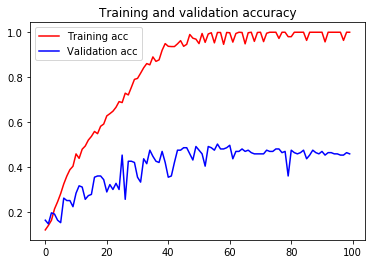

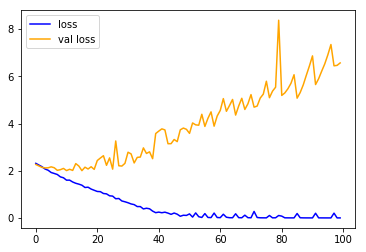

In [13]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = range(len(acc))
plt.plot(epochs, acc, 'r', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.show()


plt.plot(epochs,history.history['loss'],label='loss', color='blue')
plt.plot(epochs, history.history['val_loss'],label='val loss',color='orange')
plt.legend()
plt.show()

In [14]:
from sklearn.metrics import confusion_matrix

y_pred = model.predict(X_test)

categorical_test_labels = pd.DataFrame(Y_test).idxmax(axis=1)
categorical_preds = pd.DataFrame(y_pred).idxmax(axis=1)
confusion_matrix= confusion_matrix(categorical_test_labels, categorical_preds)
confusion_matrix

array([[ 9,  1,  1,  0,  0,  2,  0,  1,  1,  8],
       [ 0, 17,  0,  2,  1,  0,  4,  1,  0,  1],
       [ 1,  2, 13,  1,  0,  2,  1,  7,  0,  3],
       [ 0,  2,  0, 16,  4,  1,  1,  6,  1,  0],
       [ 1,  4,  3,  4, 10,  1,  1,  1,  1,  0],
       [ 0,  1,  1,  4,  2, 14,  1,  2,  0,  2],
       [ 0,  5,  1,  5,  0,  0, 11,  4,  1,  1],
       [ 1,  2,  0,  3,  5,  3,  1, 12,  1,  3],
       [ 1,  4,  1,  1,  5,  3,  0,  2, 11,  1],
       [ 5,  2,  1,  0,  0,  0,  0,  1,  0, 14]], dtype=int64)

# Problem-2

In [15]:
rnn = pd.read_csv("admData20.csv")
rnn.head()

,ExpStartDate,AdmittedNum,AppliedNum,WeeksBeforeStart,Budget
0,10/29/2018,3,61,10,87
1,10/29/2018,7,84,9,87
2,10/29/2018,10,90,8,87
3,10/29/2018,24,118,7,87
4,10/29/2018,39,132,6,87


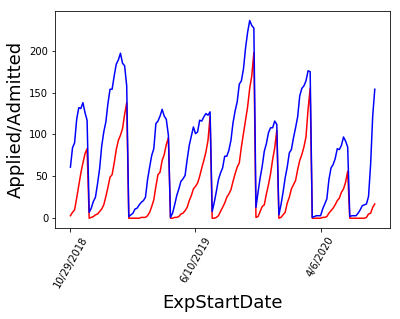

In [16]:
plt.plot(range(rnn.shape[0]),(rnn['AdmittedNum']),color = 'r')
plt.plot(range(rnn.shape[0]),(rnn['AppliedNum']),color = 'b')
plt.xticks(range(0,rnn.shape[0],60),rnn['ExpStartDate'].loc[::60],rotation=60)
plt.xlabel('ExpStartDate',fontsize=18)
plt.ylabel('Applied/Admitted',fontsize=18)
plt.show()

In [17]:
admitted = rnn.loc[:,'AdmittedNum'].values

In [18]:
trainPortion = round(admitted.shape[0]*0.7)
valPortion = round(admitted.shape[0]*0.15)
trainData = admitted[:trainPortion]
valData = admitted[trainPortion:trainPortion+valPortion]
testData = admitted[trainPortion+valPortion:]
print('We have %d training, %d validation and %d test data points.' %(len(trainData),len(valData),len(testData)))

We have 103 training, 22 validation and 22 test data points.


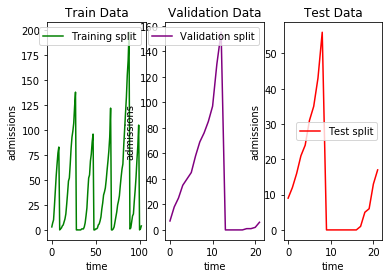

In [19]:
plt.subplot(1,3,1)
plt.plot(range(trainData.shape[0]),trainData,color='green',label='Training split')
plt.title('Train Data')
plt.xlabel('time')
plt.ylabel('admissions')
plt.legend()

plt.subplot(1,3,2)
plt.plot(range(valData.shape[0]),valData,color='purple',label='Validation split')
plt.title('Validation Data')
plt.xlabel('time')
plt.ylabel('admissions')
plt.legend()

plt.subplot(1,3,3)
plt.plot(range(testData.shape[0]),testData,color='red',label='Test split')
plt.title('Test Data')
plt.xlabel('time')
plt.ylabel('admissions')
plt.legend()

In [20]:
print(trainData.shape)
trainData = trainData.reshape(-1,1)
print(trainData.shape)
valData = valData.reshape(-1,1)
testData = testData.reshape(-1,1)

(103,)
(103, 1)


In [21]:
def createSeq(dataset, look_back,foresight):
    X,Y = [], []
    for i in range(len(dataset)-look_back-foresight):
        obs = dataset[i:(i+look_back),0]
        X.append(obs)
        Y.append(dataset[i+(look_back+foresight),0])
    return np.array(X), np.array(Y)

In [22]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range=(0, 1))
print(trainData.shape)
trainData = trainData.reshape(-1,1)
print(trainData.shape)
valData = valData.reshape(-1,1)
testData = testData.reshape(-1,1)
sc.fit(trainData)

trainNorm = sc.transform(trainData)
testNorm = sc.transform(testData)
valNorm = sc.transform(valData)

(103, 1)
(103, 1)


In [23]:
trainNormX, trainNormY = createSeq(trainNorm,look_back =2, foresight=1)
print(trainNormX.shape,trainNormY.shape)
print(trainNormX[0,:],trainNormY[0])

valNormX, valNormY = createSeq(valNorm,look_back =2, foresight=1)
testNormX, testNormY = createSeq(testNorm,look_back =2, foresight=1)

(100, 2) (100,)
[0.01515152 0.03535354] 0.12121212121212122


In [24]:
trainNormX = np.reshape(trainNormX,(trainNormX.shape[0],trainNormX.shape[1],1))
valNormX = np.reshape(valNormX,(valNormX.shape[0],valNormX.shape[1],1))
testNormX = np.reshape(testNormX,(testNormX.shape[0],testNormX.shape[1],1))

print(trainNormX.shape, valNormX.shape, testNormX.shape)

(100, 2, 1) (19, 2, 1) (19, 2, 1)


In [25]:
from keras.models import Sequential
from keras.layers import LSTM, GRU, Dense
from keras.layers import Dropout,Flatten
from keras.callbacks import ModelCheckpoint, EarlyStopping

In [26]:
model = Sequential()
model.add(LSTM(32,input_shape = (2,1), dropout=0.1, recurrent_dropout = 0.1))
model.add(Dense(1,activation='linear'))
model.compile(loss = 'mae',optimizer='adam',metrics = ['mean_absolute_error'])
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 32)                4352      
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 33        
Total params: 4,385
Trainable params: 4,385
Non-trainable params: 0
_________________________________________________________________


In [27]:
network_name = 'lstm'
filepath = network_name + "_epoch-{epoch:02d}-loss-{loss:.4f}-.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='loss',verbose=0,save_best_only=True,mode='min')
callbacks_list = [checkpoint]
network = model.fit(trainNormX,trainNormY,validation_data=(valNormX,valNormY),epochs=100,batch_size=64,callbacks=callbacks_list)

Train on 100 samples, validate on 19 samples
Epoch 1/100
100/100 [==============================] - ETA: 0s - loss: 0.2111 - mean_absolute_error: 0.211 - 0s 4ms/step - loss: 0.2233 - mean_absolute_error: 0.2233 - val_loss: 0.2189 - val_mean_absolute_error: 0.2189
Epoch 2/100
100/100 [==============================] - ETA: 0s - loss: 0.2304 - mean_absolute_error: 0.230 - 0s 90us/step - loss: 0.2154 - mean_absolute_error: 0.2154 - val_loss: 0.2124 - val_mean_absolute_error: 0.2124
Epoch 3/100
100/100 [==============================] - ETA: 0s - loss: 0.2233 - mean_absolute_error: 0.223 - 0s 80us/step - loss: 0.2078 - mean_absolute_error: 0.2078 - val_loss: 0.2083 - val_mean_absolute_error: 0.2083
Epoch 4/100
100/100 [==============================] - ETA: 0s - loss: 0.1724 - mean_absolute_error: 0.172 - 0s 80us/step - loss: 0.2014 - mean_absolute_error: 0.2014 - val_loss: 0.2067 - val_mean_absolute_error: 0.2067
Epoch 5/100
100/100 [==============================] - ETA: 0s - loss: 0.174

Epoch 38/100
100/100 [==============================] - ETA: 0s - loss: 0.1669 - mean_absolute_error: 0.166 - 0s 130us/step - loss: 0.1683 - mean_absolute_error: 0.1683 - val_loss: 0.1898 - val_mean_absolute_error: 0.1898
Epoch 39/100
100/100 [==============================] - ETA: 0s - loss: 0.1808 - mean_absolute_error: 0.180 - 0s 110us/step - loss: 0.1696 - mean_absolute_error: 0.1696 - val_loss: 0.1895 - val_mean_absolute_error: 0.1895
Epoch 40/100
100/100 [==============================] - ETA: 0s - loss: 0.1763 - mean_absolute_error: 0.176 - 0s 90us/step - loss: 0.1720 - mean_absolute_error: 0.1720 - val_loss: 0.1893 - val_mean_absolute_error: 0.1893
Epoch 41/100
100/100 [==============================] - ETA: 0s - loss: 0.1830 - mean_absolute_error: 0.183 - 0s 120us/step - loss: 0.1703 - mean_absolute_error: 0.1703 - val_loss: 0.1892 - val_mean_absolute_error: 0.1892
Epoch 42/100
100/100 [==============================] - ETA: 0s - loss: 0.1729 - mean_absolute_error: 0.172 - 0s 

Epoch 75/100
100/100 [==============================] - ETA: 0s - loss: 0.1574 - mean_absolute_error: 0.157 - 0s 130us/step - loss: 0.1596 - mean_absolute_error: 0.1596 - val_loss: 0.1794 - val_mean_absolute_error: 0.1794
Epoch 76/100
100/100 [==============================] - ETA: 0s - loss: 0.1800 - mean_absolute_error: 0.180 - 0s 120us/step - loss: 0.1558 - mean_absolute_error: 0.1558 - val_loss: 0.1789 - val_mean_absolute_error: 0.1789
Epoch 77/100
100/100 [==============================] - ETA: 0s - loss: 0.1774 - mean_absolute_error: 0.177 - 0s 130us/step - loss: 0.1690 - mean_absolute_error: 0.1690 - val_loss: 0.1786 - val_mean_absolute_error: 0.1786
Epoch 78/100
100/100 [==============================] - ETA: 0s - loss: 0.1460 - mean_absolute_error: 0.146 - 0s 120us/step - loss: 0.1540 - mean_absolute_error: 0.1540 - val_loss: 0.1781 - val_mean_absolute_error: 0.1781
Epoch 79/100
100/100 [==============================] - ETA: 0s - loss: 0.1489 - mean_absolute_error: 0.148 - 0s

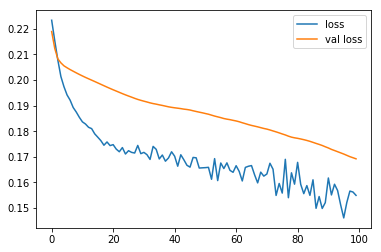

In [28]:
plt.plot(network.history['loss'],label='loss')
plt.plot(network.history['val_loss'],label='val loss')
plt.legend()
plt.show()

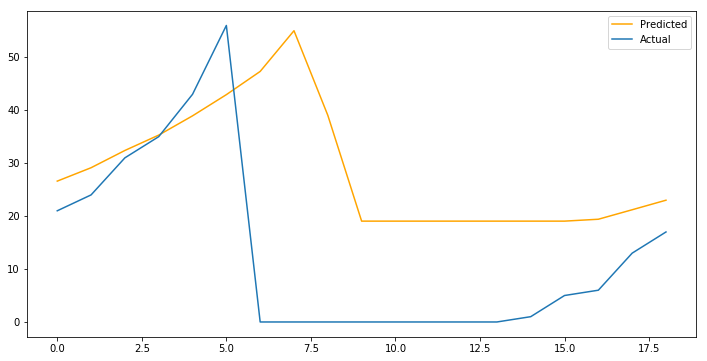

In [29]:
preds = model.predict(testNormX)
plt.figure(figsize = (12,6))
plt.plot(sc.inverse_transform(preds.reshape(-1,1)),label='Predicted',color='orange')
plt.plot(sc.inverse_transform(testNormY.reshape(-1,1)),label='Actual')
plt.legend()
plt.show()